1. Do a Simple practical application using LangChain - Practical Mode only.

In [3]:
!pip install -U langchain langchain-community langchain-core transformers accelerate sentencepiece


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 60.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.6/536.6 kB 31.8 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.36.0
    Uninstalling huggingface-hub-0.36.0:
      Successfully uninstalled huggingface-hub-0.36.0
  Attempting uninstall: transformers
    Found existing installation: transformers 4.57.6
    Uninstalling transformers-4.57.6:
      Successfully uninstalled transformers-4.57.6


imports

In [1]:
from langchain_community.llms import HuggingFacePipeline
from langchain_core.prompts import PromptTemplate

from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, pipeline

loading a free model

In [6]:
model_name = "google/flan-t5-base"

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

pipe = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    max_new_tokens=256
)

llm = HuggingFacePipeline(pipeline=pipe)


Loading weights:   0%|          | 0/282 [00:00<?, ?it/s]

The tied weights mapping and config for this model specifies to tie shared.weight to lm_head.weight, but both are present in the checkpoints, so we will NOT tie them. You should update the config with `tie_word_embeddings=False` to silence this warning
Passing `generation_config` together with generation-related arguments=({'max_new_tokens'}) is deprecated and will be removed in future versions. Please pass either a `generation_config` object OR all generation parameters explicitly, but not both.
The model 'T5ForConditionalGeneration' is not supported for text-generation. Supported models are ['PeftModelForCausalLM', 'AfmoeForCausalLM', 'ApertusForCausalLM', 'ArceeForCausalLM', 'AriaTextForCausalLM', 'BambaForCausalLM', 'BartForCausalLM', 'BertLMHeadModel', 'BertGenerationDecoder', 'BigBirdForCausalLM', 'BigBirdPegasusForCausalLM', 'BioGptForCausalLM', 'BitNetForCausalLM', 'BlenderbotForCausalLM', 'BlenderbotSmallForCausalLM', 'BloomForCausalLM', 'BltForCausalLM', 'CamembertForCausalLM

In [9]:
prompt = PromptTemplate.from_template(
    "Question: {question}\nAnswer:"
)

Create chain

In [10]:
chain = prompt | llm


Test it

In [11]:
response = chain.invoke({"question": "What is Machine Learning?"})
print(response)


Both `max_new_tokens` (=256) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Question: What is Machine Learning?
Answer:eir machines get larger through our machines which reduce barriers on those kinds. This phenomenon takes realism more tightly the scientific theories suggested otherwise but gives human science


Chat loop

In [12]:
while True:
    q = input("Ask: ")
    if q.lower() == "exit":
        break
    print(chain.invoke({"question": q}))

Ask: what is machine learning?


Both `max_new_tokens` (=256) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Question: what is machine learning?
Answer:ive (brace factors....) methodically: For processing computation with high frequencies using structured computing data sett... data
Ask: /


Both `max_new_tokens` (=256) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Question: /
Answer: day that became an exception not because but dueto
Ask: exit


2. Kaggle - Explore Kaggle Opensource and Download any dataset of your Own and Perform Simple Data Analysis. You can directly link the dataset link from the Kaggle to your Code. - Practical Mode only

In [1]:
pip install pandas matplotlib seaborn kagglehub

In [3]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# The dataset 'netflix_titles.csv' is already present in the /content/ directory.
# We can directly load it using pandas.

# Set the path to the directory containing the CSV file
path = "/content/"

# Load CSV
df = pd.read_csv("/content/iris.csv")

# Show first rows
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [5]:
# Dataset info
print("\nDataset Info:")
print(df.info())

# Check missing values
print("\nMissing Values:")
print(df.isnull().sum())

df.describe()



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

Missing Values:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Simple Exploratory Analysis

In [8]:
df["species"].value_counts()


,count
species,
setosa,50
versicolor,50
virginica,50


Simple Visualizations

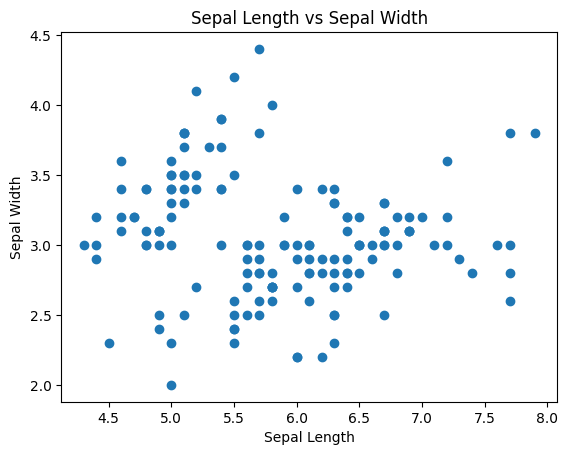

In [10]:
import matplotlib.pyplot as plt
# Sepal length vs Sepal width
plt.figure()
plt.scatter(df["sepal_length"], df["sepal_width"])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Sepal Length vs Sepal Width")
plt.show()


Species-wise petal length

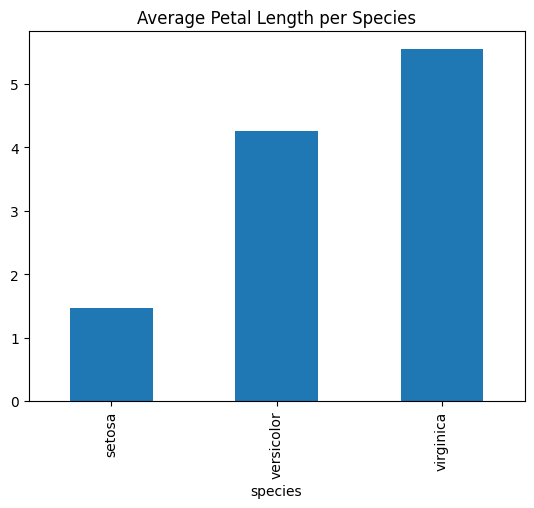

In [12]:
df.groupby("species")["petal_length"].mean().plot(kind="bar")
plt.title("Average Petal Length per Species")
plt.show()

Part 2:

(Installation of Transformer Module, Sentiment analysis, NLP, Translation and summarization and sentence embedding)

3. Fast AI - A simple application on your own to illustrate Fast AI - Practical Mode:

In [14]:
!pip install -q transformers sentence-transformers fastai


In [15]:
import fastprogress
fastprogress.force_console_behavior()
fastprogress.fastprogress.NO_BAR = True
from fastai.text.all import *
import pandas as pd


In [16]:
texts = [
    "I love this product",
    "This is the worst experience ever",
    "FastAI is very easy to use",
    "I am unhappy with the service",
    "The movie was amazing",
    "The food tasted bad"
]

labels = [
    "positive",
    "negative",
    "positive",
    "negative",
    "positive",
    "negative"
]


In [17]:
df = pd.DataFrame({"text": texts, "label": labels})

dls = TextDataLoaders.from_df(
    df,
    text_col="text",
    label_col="label",
    valid_pct=0.2,
    seed=42
)


In [18]:
from fastai.callback.progress import ProgressCallback

learn = text_classifier_learner(
    dls,
    AWD_LSTM,
    metrics=accuracy
)

# Explicitly remove the default ProgressCallback
# This will prevent the problematic progress bar from being displayed.
learn.remove_cb(ProgressCallback)

learn.fine_tune(1)

<div><progress max="105067061" value="105070592"></progress> 100.00% [105070592/105067061 00:01&lt;00:00]</div>

[0, nan, 0.6498174667358398, 1.0, '00:00']
[0, nan, 0.6498174667358398, 1.0, '00:00']


In [19]:
learn.predict("I really enjoyed using FastAI")


('positive', tensor(1), tensor([0.4809, 0.5191]))

In [20]:
from transformers import pipeline

In [21]:
sentiment = pipeline("sentiment-analysis")

sentiment("I absolutely love studying artificial intelligence")


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f.
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/104 [00:00<?, ?it/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

[{'label': 'POSITIVE', 'score': 0.9990745782852173}]

In [27]:
!pip install -U transformers accelerate sentencepiece


In [28]:
from transformers import pipeline

generator = pipeline(
    "text-generation",
    model="google/flan-t5-base"
)

text = """
Artificial intelligence is a rapidly growing field that focuses on building
systems capable of performing tasks that require human intelligence.
"""

prompt = "Summarize the following text:\n" + text

output = generator(prompt, max_new_tokens=60, do_sample=False)

print(output[0]["generated_text"])

Loading weights:   0%|          | 0/282 [00:00<?, ?it/s]

The tied weights mapping and config for this model specifies to tie shared.weight to lm_head.weight, but both are present in the checkpoints, so we will NOT tie them. You should update the config with `tie_word_embeddings=False` to silence this warning
The model 'T5ForConditionalGeneration' is not supported for text-generation. Supported models are ['PeftModelForCausalLM', 'AfmoeForCausalLM', 'ApertusForCausalLM', 'ArceeForCausalLM', 'AriaTextForCausalLM', 'BambaForCausalLM', 'BartForCausalLM', 'BertLMHeadModel', 'BertGenerationDecoder', 'BigBirdForCausalLM', 'BigBirdPegasusForCausalLM', 'BioGptForCausalLM', 'BitNetForCausalLM', 'BlenderbotForCausalLM', 'BlenderbotSmallForCausalLM', 'BloomForCausalLM', 'BltForCausalLM', 'CamembertForCausalLM', 'LlamaForCausalLM', 'CodeGenForCausalLM', 'CohereForCausalLM', 'Cohere2ForCausalLM', 'CpmAntForCausalLM', 'CTRLLMHeadModel', 'CwmForCausalLM', 'Data2VecTextForCausalLM', 'DbrxForCausalLM', 'DeepseekV2ForCausalLM', 'DeepseekV3ForCausalLM', 'DiffLl

Summarize the following text:

Artificial intelligence is a rapidly growing field that focuses on building
systems capable of performing tasks that require human intelligence.



In [29]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("all-MiniLM-L6-v2")

sentences = [
    "Artificial intelligence is powerful",
    "Machine learning is a subset of AI",
    "FastAI simplifies deep learning"
]

embeddings = model.encode(sentences)

print(embeddings.shape)


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/103 [00:00<?, ?it/s]

BertModel LOAD REPORT from: sentence-transformers/all-MiniLM-L6-v2
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

(3, 384)


4. Hugging Face AI - A simple application on your own to illustrate Hugging Face AI - Practical Mode




In [30]:
!pip install -q transformers gradio


In [31]:
from transformers import pipeline

import gradio as gr


In [32]:
classifier = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f.
Using a pipeline without specifying a model name and revision in production is not recommended.


Loading weights:   0%|          | 0/104 [00:00<?, ?it/s]

In [33]:
def analyze_text(text):

    result = classifier(text)[0]

    return f"Label: {result['label']}, Score: {round(result['score'], 4)}"

In [34]:
demo = gr.Interface(

    fn=analyze_text,

    inputs="text",

    outputs="text",

    title="My First AI Sentiment App",

    description="Type a sentence below to see if it's Positive or Negative!"

)


In [35]:
demo.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://aaa19c1ee439423a1a.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Class Activity: Fast AI

In [36]:
!pip install -Uqq fastai ddgs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.7/161.7 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 19.5 MB/s eta 0:00:00


In [37]:
from fastai.vision.all import *
from ddgs import DDGS

def search_images(term, max_images=30):
    print(f"Searching for '{term}'...")
    with DDGS() as ddgs:
        # Fetch image URLs using DuckDuckGo
        results = ddgs.images(query=term, max_results=max_images)
        return L([r['image'] for r in results])

In [38]:
searches = 'forest','bird'
path = Path('bird_or_not')

# Loop through our search terms and save images to folders
for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    # Reduced max_images to 1 to avoid hitting the DuckDuckGo rate limit.
    download_images(dest, urls=search_images(f'{o} photo', max_images=30))
    resize_images(path/o, max_size=400, dest=path/o)

Searching for 'forest photo'...
Searching for 'bird photo'...


In [39]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32, num_workers=0)

In [40]:
# Use a pre-trained ResNet18 model (Transfer Learning)
learn = vision_learner(dls, resnet18, metrics=error_rate)
# Explicitly remove the default ProgressCallback to avoid conflicts with disabled progress bars
learn.remove_cb(ProgressCallback)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 105MB/s]


[0, 0.7650266289710999, 2.540989398956299, 0.4545454680919647, '00:11']
[0, 1.2005106210708618, 1.9233603477478027, 0.4545454680919647, '00:15']
[1, 0.8538429141044617, 1.3963689804077148, 0.4545454680919647, '00:14']
[2, 0.6028996109962463, 0.8494560718536377, 0.3636363744735718, '00:19']


In [41]:
import requests
from PIL import Image

urls = search_images('bird photo', max_images=1)
if urls:
    img_url = urls[0]
    response = requests.get(img_url, stream=True)
    response.raise_for_status() # Raise an exception for HTTP errors
    with open('test_bird.jpg', 'wb') as out_file:
        out_file.write(response.content)

    is_bird,_,probs = learn.predict(PILImage.create('test_bird.jpg'))
    print(f"This is a: {is_bird}.")
    print(f"Probability it's a bird: {probs[0]:.4f}")
else:
    print("No image URL found for 'bird photo'.")

Searching for 'bird photo'...
This is a: bird.
Probability it's a bird: 1.0000
